## News Sentiment Analysis and Crypto price prediction of Dogecoin

In [1]:
#project description

In [2]:
## Book 2 : Dogecoin Sentiment Analysis

In [3]:
# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [4]:
# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/riteshchugani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Load the News Articles from the CSV File as a DataFrame

In [6]:
# Load news from CSV file
file_path = Path("dogecoin_news_en_.csv")
news_df = pd.read_csv(file_path, encoding="utf-8-sig")
news_df.head()

,title,description,text,date,language
0,Key dogecoin developer Ross Nicoll is stepping...,"""I'm handing over everything I can to the Doge...","Ross Nicoll, one of the primary developers beh...",2022-02-17,en
1,Shiba inu rallies 50% to a new 2022 high as me...,Other meme coins from dogecoin to floki inu al...,The dogecoin-inspired cryptocurrency shiba inu...,2022-02-07,en
2,"Ukraine is asking for dogecoin donations, pref...","Dogecoin is now worth more than rubles, accord...","Dogecoin is now worth more than rubles, accord...",2022-03-02,en
3,"Bitcoin, Dogecoin, Shiba Inu and other cryptoc...","Far from being a safe bet in risky times, cryp...",Cryptocurrencies around the world are getting ...,2022-02-18,en
4,Crypto Users Answer Ukraine's Call for Help By...,"However, some crypto platforms are refusing to...",As the international community rallies around ...,2022-03-03,en


## Calculating VADER Sentiment Score for News Titles and Text

In [7]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [11]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in news_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
news_df = news_df.join(title_sentiment_df).join(text_sentiment_df)

news_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Key dogecoin developer Ross Nicoll is stepping...,"""I'm handing over everything I can to the Doge...","Ross Nicoll, one of the primary developers beh...",2022-02-17,en,-0.4215,0.000,0.859,0.141,-1,-0.4215,0.000,0.926,0.074,-1
1,Shiba inu rallies 50% to a new 2022 high as me...,Other meme coins from dogecoin to floki inu al...,The dogecoin-inspired cryptocurrency shiba inu...,2022-02-07,en,0.0000,0.000,1.000,0.000,0,0.3818,0.069,0.931,0.000,1
2,"Ukraine is asking for dogecoin donations, pref...","Dogecoin is now worth more than rubles, accord...","Dogecoin is now worth more than rubles, accord...",2022-03-02,en,0.6133,0.294,0.706,0.000,1,0.5574,0.186,0.747,0.067,1
3,"Bitcoin, Dogecoin, Shiba Inu and other cryptoc...","Far from being a safe bet in risky times, cryp...",Cryptocurrencies around the world are getting ...,2022-02-18,en,-0.3400,0.000,0.806,0.194,-1,0.0000,0.000,1.000,0.000,0
4,Crypto Users Answer Ukraine's Call for Help By...,"However, some crypto platforms are refusing to...",As the international community rallies around ...,2022-03-03,en,0.4019,0.231,0.769,0.000,1,0.0000,0.000,1.000,0.000,0


## Analyzing Sentiments Results

<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

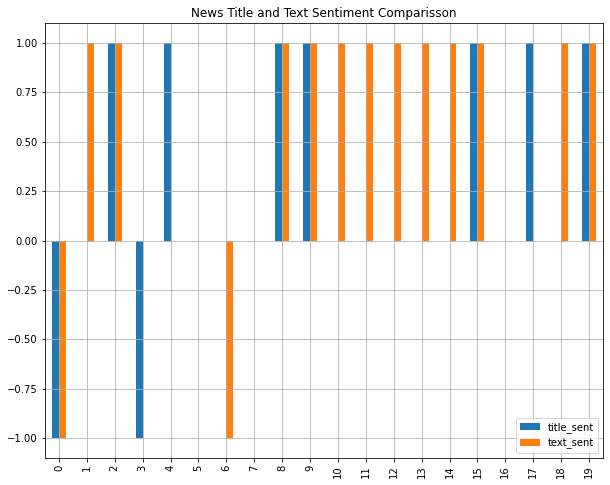

In [12]:
# Plot bar chart
news_df.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

In [13]:
# Describe dataframe
news_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.124045,0.111000,0.872250,0.016750,0.250000,0.247685,0.089450,0.883200,0.027350,0.500000
std,0.284517,0.134707,0.130245,0.052267,0.638666,0.383354,0.090654,0.103276,0.044742,0.688247
min,-0.421500,0.000000,0.648000,0.000000,-1.000000,-0.476700,0.000000,0.685000,0.000000,-1.000000
25%,0.000000,0.000000,0.755750,0.000000,0.000000,0.000000,0.000000,0.809250,0.000000,0.000000
50%,0.000000,0.000000,0.880000,0.000000,0.000000,0.159050,0.064500,0.902500,0.000000,1.000000
75%,0.406800,0.244250,1.000000,0.000000,1.000000,0.589275,0.160250,1.000000,0.052750,1.000000
max,0.613300,0.352000,1.000000,0.194000,1.000000,0.897700,0.315000,1.000000,0.145000,1.000000


## Dogecoin Crypto price

In [14]:
#Imports
import yfinance as yf
from yahoofinancials import YahooFinancials

In [15]:
doge_df = yf.download('DOGE-USD', 
                      start='2019-01-01', 
                      end='2022-03-04', 
                      progress=False,
)
doge_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,0.002346,0.002392,0.002322,0.002392,0.002392,17364744
2019-01-02,0.002388,0.002458,0.002372,0.002407,0.002407,18015392
2019-01-03,0.002404,0.002414,0.002356,0.002360,0.002360,17619234
2019-01-04,0.002364,0.002397,0.002274,0.002315,0.002315,19530100
2019-01-05,0.002320,0.002350,0.002280,0.002319,0.002319,17148586


## Merging Dogecoin Price with Sentiment Data

In [16]:
# Cleaning the sentiment data to be indexed by date
news_df_edit = news_df.drop(columns=["title", "description", "text"])
news_df_edit.head()

,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-02-17,en,-0.4215,0.000,0.859,0.141,-1,-0.4215,0.000,0.926,0.074,-1
1,2022-02-07,en,0.0000,0.000,1.000,0.000,0,0.3818,0.069,0.931,0.000,1
2,2022-03-02,en,0.6133,0.294,0.706,0.000,1,0.5574,0.186,0.747,0.067,1
3,2022-02-18,en,-0.3400,0.000,0.806,0.194,-1,0.0000,0.000,1.000,0.000,0
4,2022-03-03,en,0.4019,0.231,0.769,0.000,1,0.0000,0.000,1.000,0.000,0


In [18]:
news_df_edit["date"] = pd.to_datetime(news_df_edit["date"])
print(news_df_edit.dtypes)

date              datetime64[ns]
language                  object
title_compound           float64
title_pos                float64
title_neu                float64
title_neg                float64
title_sent                 int64
text_compound            float64
text_pos                 float64
text_neu                 float64
text_neg                 float64
text_sent                  int64
dtype: object


In [20]:
news_df_edit.sort_values(by='date', inplace=True)
print(news_df_edit)

         date language  title_compound  title_pos  title_neu  title_neg  \
19 2022-02-05       en          0.4215      0.237      0.763      0.000   
1  2022-02-07       en          0.0000      0.000      1.000      0.000   
17 2022-02-07       en          0.4939      0.296      0.704      0.000   
12 2022-02-08       en          0.0000      0.000      1.000      0.000   
9  2022-02-08       en          0.5859      0.352      0.648      0.000   
15 2022-02-09       en          0.4404      0.266      0.734      0.000   
7  2022-02-11       en          0.0258      0.099      0.901      0.000   
13 2022-02-11       en          0.0000      0.000      1.000      0.000   
10 2022-02-12       en          0.0258      0.268      0.732      0.000   
8  2022-02-15       en          0.2339      0.177      0.823      0.000   
14 2022-02-17       en          0.0000      0.000      1.000      0.000   
0  2022-02-17       en         -0.4215      0.000      0.859      0.141   
3  2022-02-18       en   